In [3]:
import os
import glob
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

In [4]:
def extract_data(directory):
    data = []
    label = []
    for class_folder in os.listdir(directory):
        class_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                if filename.endswith(".pkl"):
                    file_path = os.path.join(class_path, filename)
                    with open(file_path, 'rb') as file:
                        item = pickle.load(file)
                        data.append(item['rcs']['total'])
                        label.append(item['target_id'])
    return np.array(data), np.array(label)

def awgn(signal, snr_db):
    if snr_db is None:
        return signal
    else:
        signal_power = np.mean(signal**2)
        snr_linear = 10 ** (snr_db / 10)
        noise_power = signal_power / snr_linear
        noise = np.random.normal(0, np.sqrt(noise_power), signal.shape)
        noisy_signal = signal + noise 
        noisy_signal = np.clip(noisy_signal, a_min=1e-10, a_max=None)   # 对观测rcs数据进行截断 
        return noisy_signal

def db(rcs_data):
    return 10 * np.log10(rcs_data)

# Create Original Dataset.

In [82]:
# # Create RCS Dataset
# base_dir = '../../Dataset'
# train_dir = os.path.join(base_dir, 'train')
# test_dir = os.path.join(base_dir, 'test')

# # Load data
# train_data,train_label = extract_data(train_dir)
# test_data,test_label = extract_data(test_dir)

# train_df = pd.DataFrame(np.concatenate((np.array(train_data), np.array(train_label).reshape(-1, 1)),axis=1))
# test_df = pd.DataFrame(np.concatenate((np.array(test_data), np.array(test_label).reshape(-1, 1)),axis=1))

# train_df.columns = [f'{i}' for i in range(2048)] + ['label']
# test_df.columns = [f'{i}' for i in range(2048)] + ['label']

# train_df.to_csv(f'train_origin.csv',index=False)
# test_df.to_csv(f'test_origin.csv',index=False) 

In [85]:
# read raw data
train_df = pd.read_csv('./train_origin.csv')
test_df = pd.read_csv('./test_origin.csv')

In [86]:
train_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,label
0,0.042503,0.027985,0.019686,0.027017,0.041187,0.046590,0.036708,0.022854,0.020317,0.031762,...,0.035712,0.043944,0.043800,0.035815,0.026176,0.022015,0.026269,0.035749,0.043767,0.0
1,0.032691,0.028398,0.024721,0.022509,0.022274,0.023948,0.027516,0.032658,0.037713,0.041807,...,0.034079,0.030696,0.027178,0.023972,0.021640,0.020252,0.020214,0.021679,0.024411,0.0


# Create Noised Dataset

In [87]:
# train_df = pd.read_csv('./train_origin.csv')
# test_df = pd.read_csv('./test_origin.csv')

# train_data = train_df.iloc[:, :-1].values # 25200,2048
# train_label = train_df.iloc[:, -1].values # 25200

# test_data = test_df.iloc[:, :-1].values
# test_label = test_df.iloc[:, -1].values

In [97]:
# snr = 20
# noised_train_data = np.apply_along_axis(awgn, 1, train_data, snr_db = snr)
# noised_test_data = np.apply_along_axis(awgn, 1, test_data, snr_db = snr)

In [ ]:
snr = 20
noised_train_data = pd.read_csv(f'./train_{snr}db.csv')

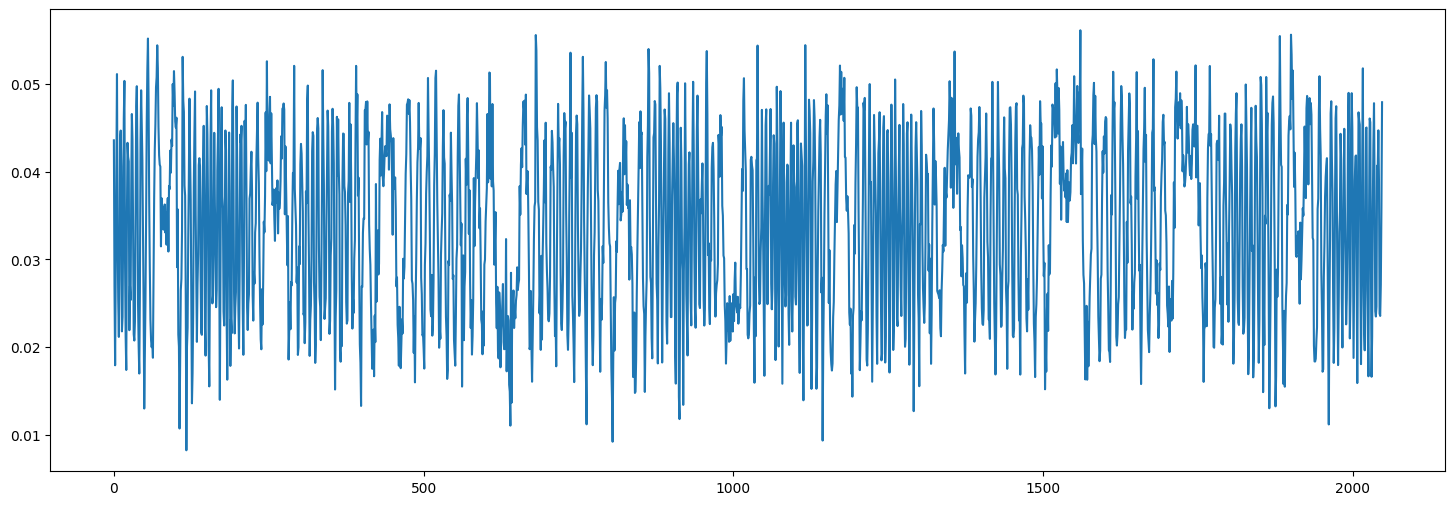

In [11]:
plt.figure(figsize=(18,6))
plt.plot(noised_train_data.iloc[0,:-1].values);

In [99]:
# train_df = pd.DataFrame(np.concatenate((np.array(noised_train_data), np.array(train_label).reshape(-1, 1)),axis=1))
# test_df = pd.DataFrame(np.concatenate((np.array(noised_test_data), np.array(test_label).reshape(-1, 1)),axis=1))

In [100]:
# train_df.columns = [f'{i}' for i in range(2048)] + ['label']
# test_df.columns = [f'{i}' for i in range(2048)] + ['label']

# train_df.to_csv(f'train_{snr}db.csv', index=False)
# test_df.to_csv(f'test_{snr}db.csv', index=False) 

In [101]:
# train_data = train_df.iloc[:, :-1].values.reshape(-1, 1, train_df.shape[1] - 1) # (25200, 1, 2048)
# train_label = train_df.iloc[:, -1].values # 25200

# test_data = test_df.iloc[:, :-1].values.reshape(-1, 1, test_df.shape[1] - 1) # (1600, 1, 2048)
# test_label = test_df.iloc[:, -1].values

In [12]:
# plt.figure(figsize=(18,6))
# plt.plot(db(train_data[0][0]))

In [11]:
# Create 0db- 20db(25db already exist.)
# for snr_db in np.arange(0,20,5):
#     train_df = pd.read_csv('./train_origin.csv')
#     test_df =  pd.read_csv('./test_origin.csv')

#     train_data = train_df.iloc[:, :-1].values # 25200,2048
#     train_label = train_df.iloc[:, -1].values # 25200

#     test_data = test_df.iloc[:, :-1].values
#     test_label = test_df.iloc[:, -1].values

#     noised_train_data = np.apply_along_axis(awgn, 1, train_data, snr_db = snr_db)
#     noised_test_data = np.apply_along_axis(awgn, 1, test_data, snr_db = snr_db)

#     train_df = pd.DataFrame(np.concatenate((np.array(noised_train_data), np.array(train_label).reshape(-1, 1)),axis=1))
#     test_df = pd.DataFrame(np.concatenate((np.array(noised_test_data), np.array(test_label).reshape(-1, 1)),axis=1))

#     train_df.columns = [f'{i}' for i in range(2048)] + ['label']
#     test_df.columns = [f'{i}' for i in range(2048)] + ['label']

#     train_df.to_csv(f'train_{snr_db}db.csv', index=False)
#     test_df.to_csv(f'test_{snr_db}db.csv', index=False) 


# Read Dataset & Classifacaion

In [13]:
snr = 15

train_df = pd.read_csv(f'./train_{snr}db.csv')
test_df = pd.read_csv(f'./test_{snr}db.csv')

train_data = train_df.iloc[:, :-1].values.reshape(-1, 1, train_df.shape[1] - 1) # (25200, 1, 2048)
train_label = train_df.iloc[:, -1].values # 25200

test_data = test_df.iloc[:, :-1].values.reshape(-1, 1, test_df.shape[1] - 1) # (1600, 1, 2048)
test_label = test_df.iloc[:, -1].values

(25200, 1, 2048) (1600, 1, 2048)


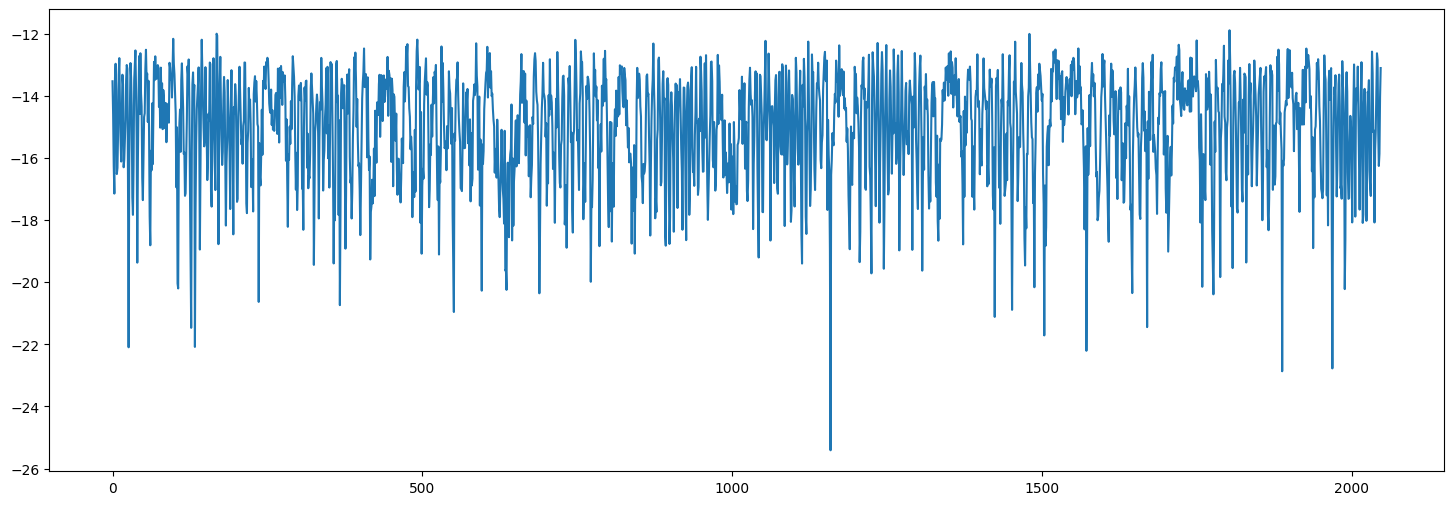

In [14]:
print(train_data.shape, test_data.shape)
plt.figure(figsize=(18,6))
plt.plot(db(train_data[0][0]))

In [15]:
from aeon.classification.convolution_based import RocketClassifier
from sklearn.metrics import accuracy_score

rocket = RocketClassifier(num_kernels=1000, n_jobs=-1)
rocket.fit(train_data, train_label)
y_pred = rocket.predict(test_data)

print(accuracy_score(test_label, y_pred))

0.940625


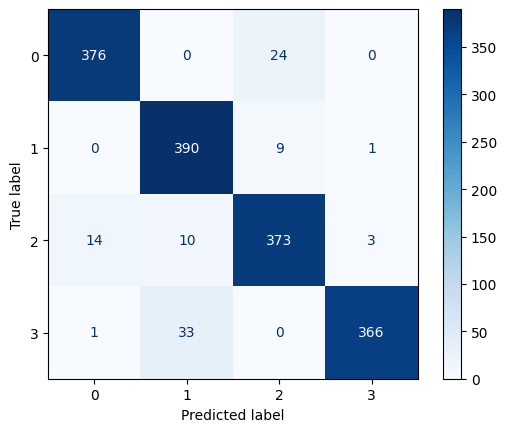

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_label, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(rocket, train_data, train_label, cv=5, scoring='accuracy')

In [20]:
# 输出交叉验证的平均精度
print("Cross-validation Accuracy Scores:", cross_val_scores)
print("Mean Cross-validation Accuracy:", cross_val_scores.mean())


Cross-validation Accuracy Scores: [0.9327381  0.92261905 0.80595238 0.92043651 0.93948413]
Mean Cross-validation Accuracy: 0.9042460317460318


In [1]:
def extract_features(data, window_size, step_size):
    features = []
    for start in range(0, len(data) - window_size + 1, step_size):
        window = data[start:start + window_size]
        feature = [
            np.mean(window),
            np.max(window),
            np.min(window),
            np.std(window),
            np.ptp(window),
            np.median(window),
            pd.Series(window).skew(),
            pd.Series(window).kurt(),
            np.sqrt(np.mean(window**2)),
            np.mean(np.abs(window)),
            np.sum(np.abs(np.diff(window)))
        ]
        features.append(feature)
    return np.array(features).reshape(-1)

In [27]:
from aeon.classification.convolution_based import RocketClassifier
from aeon.classification.distance_based import KNeighborsTimeSeriesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from aeon.classification.shapelet_based import ShapeletTransformClassifier
from aeon.classification.sklearn import RotationForestClassifier

def data_pre_processing(data):
    # normalization
    # fourier transform
    # shapelet transform...
    return data


def r_classification(train_df, test_df):
    # use specific method to classification
    train_data = train_df.iloc[:, :-1].values.reshape(-1, 1, train_df.shape[1] - 1)
    train_label = train_df.iloc[:, -1].values
    test_data = test_df.iloc[:, :-1].values.reshape(-1, 1, test_df.shape[1] - 1)
    test_label = test_df.iloc[:, -1].values

    train_data = data_pre_processing(train_data)
    test_data = data_pre_processing(test_data)

    r = RocketClassifier(num_kernels = 1000, rocket_transform='rocket', n_jobs=-1)
    r.fit(train_data, train_label)
    test_pred = r.predict(test_data)
    return accuracy_score(test_label, test_pred)


def minir_classification(train_df, test_df):
    # use specific method to classification
    train_data = train_df.iloc[:, :-1].values.reshape(-1, 1, train_df.shape[1] - 1)
    train_label = train_df.iloc[:, -1].values
    test_data = test_df.iloc[:, :-1].values.reshape(-1, 1, test_df.shape[1] - 1)
    test_label = test_df.iloc[:, -1].values

    train_data = data_pre_processing(train_data)
    test_data = data_pre_processing(test_data)

    mini_r = RocketClassifier(num_kernels = 1000, rocket_transform="minirocket", n_jobs=-1)
    mini_r.fit(train_data, train_label)
    test_pred = mini_r.predict(test_data)

    return accuracy_score(test_label, test_pred)

def knn_classification(train_df, test_df):
    # use specific method to classification
    train_data = train_df.iloc[:, :-1].values.reshape(-1, 1, train_df.shape[1] - 1)
    train_label = train_df.iloc[:, -1].values
    test_data = test_df.iloc[:, :-1].values.reshape(-1, 1, test_df.shape[1] - 1)
    test_label = test_df.iloc[:, -1].values

    train_data = data_pre_processing(train_data)
    test_data = data_pre_processing(test_data)

    knn = KNeighborsTimeSeriesClassifier(distance="euclidean")
    knn.fit(train_data, train_label)
    test_pred = knn.predict(test_data)
    return accuracy_score(test_label, test_pred)


# 运行速度极慢这俩，考虑手动复现吧

def svm_classification(train_df, test_df):

    train_data = train_df.iloc[:, :-1].values
    train_label = train_df.iloc[:, -1].values
    test_data = test_df.iloc[:, :-1].values
    test_label = test_df.iloc[:, -1].values

    train_data = np.apply_along_axis(extract_features, 1, train_data, window_size = 400, step_size = 100)
    test_data = np.apply_along_axis(extract_features, 1, test_data, window_size = 400, step_size = 100)

    svm = SVC(kernel="linear", C=1.0)
    svm.fit(train_data, train_label)

    test_pred = svm.predict(test_data)

    return accuracy_score(test_label, test_pred)

def shapeletclassification(train_df, test_df):
    train_data = train_df.iloc[:, :-1].values
    train_label = train_df.iloc[:, -1].values
    test_data = test_df.iloc[:, :-1].values
    test_label = test_df.iloc[:, -1].values

    train_data = data_pre_processing(train_data)
    test_data = data_pre_processing(test_data)

    clf = ShapeletTransformClassifier(
        estimator=RotationForestClassifier(n_estimators=3),
        n_shapelet_samples=100,
        max_shapelets=10,
        batch_size=100,
        n_jobs=-1
    )
    clf.fit(train_data, train_label)
    test_pred = clf.predict(test_data)

    return accuracy_score(test_label, test_pred)



In [28]:
# get all accuracy under different SNR.

dataset_list = glob.glob('./*.csv')
accuracy_dict = {} 

for snr_db in range(0, 25, 5):
    print(f'processing: {snr_db}/20')
    data_pair = [key for key in dataset_list if re.search(f'_{snr_db}db', key)]
    train_dir = [key for key in data_pair if re.search(r'train', key)][0]
    train_df = pd.read_csv(train_dir)
    test_dir = [key for key in data_pair if re.search(r'test', key)][0]
    test_df = pd.read_csv(test_dir)

    accuracy_dict[f'{snr_db}db'] = shapeletclassification(train_df, test_df)
    break

print(accuracy_dict)   

processing: 0/20


- MiniRocket
{'0db': 0.805625, '5db': 0.848125, '10db': 0.874375, '15db': 0.89625, '20db': 0.898125}

- Rocket
{'0db': 0.774375, '5db': 0.861875, '10db': 0.900625, '15db': 0.904246/0.94375, '20db': 0.9525}

- knn(distance="euclidean")
{'0db': 0.409375, '5db': 0.441875, '10db': 0.4525, '15db': 0.46, '20db': 0.45875}



